In [116]:
# Import packages

import os
import numpy as np
import math as math
from matplotlib import pyplot as plt

In [117]:
# Define constants:
m = 1000 # mass of cow in kg
g = 9.8 # grav acceleration in m/s/s
timestep = 0.01
nsteps = 2000 # max number of steps

# Define initial conditions:
x_0 = 0 # initial x condition
y_0 = 200 # initial y condition
vx_0 = 10 # initial velocity in x-direction
vy_0 = 0 # initial velocity in y-direction

In [105]:
# Total force vector function:
def force(mass, g, vx, vy, C):
    fg_x = 0 # force of gravity in x-direction
    fg_y = -mass*g # force of gravity in the y-direction

    # Drag force is negative because it acts in opposite direction of velocity
    # For each component, the magnitude of v is multiplied by its corresponding component
    # due to scaling of the unit vector. 
    fd_x = -C * np.sqrt(vx**2 + vy**2) * vx
    fd_y = -C * np.sqrt(vx**2 + vy**2) * vy
    
    # Total force values:
    fx = fg_x + fd_x # sum of forces in x-direction
    fy = fg_y + fd_y # sum of forces in y-direction
    
    return fx, fy

In [106]:
# Function that takes the cow’s current x, v, and F and returns a new x and v some small time later:
def new_vals(fx, fy, v_x, v_y, dt, x0, y0, m):
    
    # Need acceleration to calutate v_f
    a_x = fx / m
    a_y = fy / m

    # Plug a into kinematic eq vf = v0 + at
    vf_x = v_x + a_x * dt
    vf_y = v_y + a_y * dt

    # Solve for new position with xf = x0 + vt
    x_f = x0 + v_x * dt
    y_f = y0 + v_y * dt

    return vf_x, vf_y, x_f, y_f


In [145]:
# this gets the kinetic energy, potential energy, and total energy
def energy(x0 ,y0, v_x, v_y, mass, g):
    T= .5 * mass * (v_x**2 + v_y**2)
    U = mass * g * y0
    E = T + U
    return T, U, E

In [146]:
# Doing a test to see if code runs:
fx, fy = force(m, g, vx_0, vy_0, 0.05)
vf_x, vf_y, x_f, y_f = new_vals(fx, fy, vx_0, vy_0, timestep, x_0, y_0, m)
energy(x_0 ,y_0, vf_x, vf_y, m, g)

(50004.30200125, 1960000.0, 2010004.30200125)

In [147]:
# Values for plot
t_vals = np.zeros(nsteps)
x_vals = np.zeros(nsteps)
y_vals = np.zeros(nsteps)
vx_vals = np.zeros(nsteps)
vy_vals = np.zeros(nsteps)

In [148]:
# Define the initial values for the plot
x = x_0
y = y_0
vx = vx_0
vy = vy_0

for i in range(nsteps): # Index over all of the timesteps
    t_vals[i] = i * timestep
    x_vals[i] = x
    y_vals[i] = y
    
    # Call the updated force, velocity, and position values
    fx, fy = force(m, g, vx, vy, 0.05)
    vx, vy, x, y = new_vals(fx, fy, vx, vy, timestep, x, y, m)
    
    # For before the cow reaches the ground
    if y <= 0:
        t_vals = t_vals[:i+1]
        x_vals = x_vals[:i+1]
        y_vals = y_vals[:i+1]
        vx_vals = vx_vals[:i+1]
        vy_vals = vy_vals[:i+1]
        break

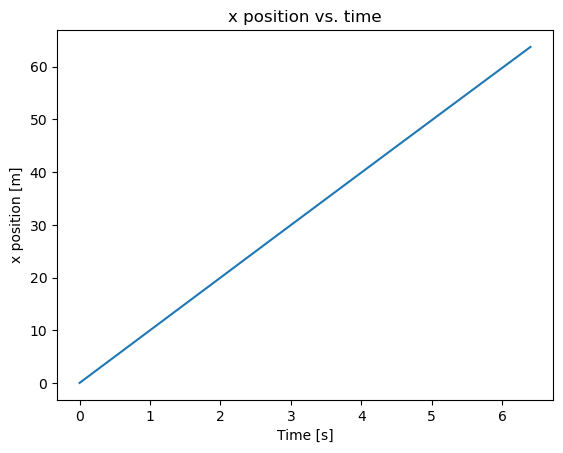

In [149]:
plt.plot(t_vals, x_vals)
plt.xlabel("Time [s]")
plt.ylabel("x position [m]")
plt.title("x position vs. time")
plt.show()


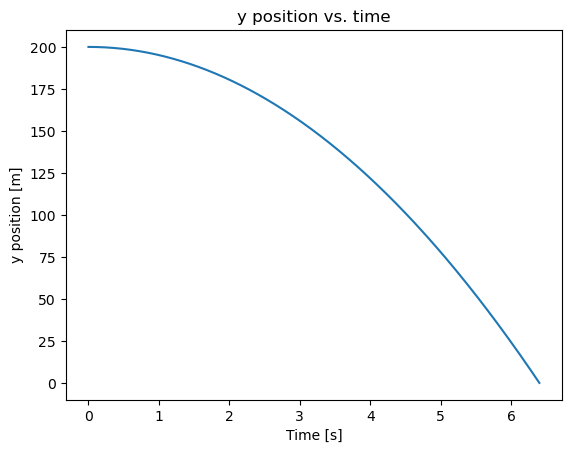

In [150]:
plt.plot(t_vals, y_vals)
plt.xlabel("Time [s]")
plt.ylabel("y position [m]")
plt.title("y position vs. time")
plt.show()

In [151]:
# Is energy conserved as a function of time?

# Calculate the initial energy:
T0, U0, E0 = energy(x_0, y_0, vx_0, vy_0, m, g)
print("Initial Energy:", E0)

# Calculate the final energy:
Tf, Uf, Ef = energy(x, y, vx, vy, m, g)
print("Final Energy:", Ef)

print("Difference in energy:", Ef - E0)



Initial Energy: 2010000.0
Final Energy: 1991962.5850959867
Difference in energy: -18037.414904013276


No, the energy is not conserved because the change in energy is not 0. This makes sense because the drag force is not path-independent.

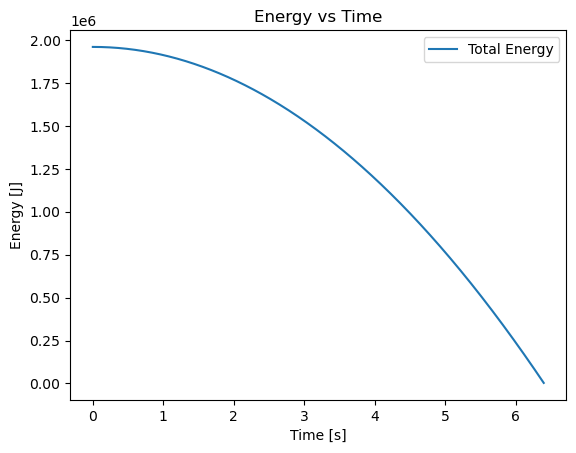

In [153]:
# Values for energy vs. time plot
E_vals = np.zeros(len(t_vals))

for i in range(len(t_vals)):
    T, U, E = energy(x_vals[i], y_vals[i], vx_vals[i], vy_vals[i], m, g)
    E_vals[i] = E

plt.plot(t_vals, E_vals, label='Total Energy')
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.title('Energy vs Time')
plt.legend()
plt.show()
